Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

Who Loged in more than 3 times in 3 separate days :


In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('takehome_user_engagement.csv')



In [2]:
df['time_stamp_days'] = [row[:10] for row in df['time_stamp']]
df['time_stamp_s'] = df['time_stamp'].shift(-2)


In [3]:
df.head()

,time_stamp,user_id,visited,time_stamp_days,time_stamp_s
0,2014-04-22 03:53:30,1,1,2014-04-22,2013-11-29 03:45:04
1,2013-11-15 03:45:04,2,1,2013-11-15,2013-12-09 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29,2013-12-25 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09,2013-12-31 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25,2014-01-08 03:45:04


In [4]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'] , format="%Y/%m/%d")


In [5]:
df_v = df.groupby('user_id').agg({'time_stamp':
                                 [np.min, np.max],
                                  
                                  'user_id':'count'
                                     
                                  
                                    } )


In [6]:
df
df = df.drop_duplicates()
len(df)


207917

In [7]:
df['time_stamp_s'] = df['time_stamp'].shift(-2)
df['user_id_next'] = df['user_id'].shift(-2)

In [8]:
df['time_delta'] = (df['time_stamp_s'] -  df['time_stamp'] ) /np.timedelta64(1,'h')

In [9]:
g = df.groupby('user_id')

df_new=g.filter(lambda x: len(x) > 1) 

In [10]:
df_new.head()

,time_stamp,user_id,visited,time_stamp_days,time_stamp_s,user_id_next,time_delta
1,2013-11-15 03:45:04,2,1,2013-11-15,2013-12-09 03:45:04,2.0,576.0
2,2013-11-29 03:45:04,2,1,2013-11-29,2013-12-25 03:45:04,2.0,624.0
3,2013-12-09 03:45:04,2,1,2013-12-09,2013-12-31 03:45:04,2.0,528.0
4,2013-12-25 03:45:04,2,1,2013-12-25,2014-01-08 03:45:04,2.0,336.0
5,2013-12-31 03:45:04,2,1,2013-12-31,2014-02-03 03:45:04,2.0,816.0


In [11]:
df_new = df_new[df_new['user_id']==df_new['user_id_next']]

In [12]:
df_new = df_new[df_new['time_delta']<169]

In [13]:
adopted_users = df_new['user_id'].unique().tolist()

In [14]:
data = pd.read_csv('takehome_users - takehome_users.csv')


In [15]:

data = pd.get_dummies(data, prefix='source', columns=['creation_source'])


In [16]:
data


,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 3:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,1,0,0,0,0
1,2,2013-11-15 3:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0,1,0,0,0
3,4,2013-05-21 8:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,1,0,0,0,0
5,6,2013-12-17 3:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1.387424e+09,0,0,197,11241.0,1,0,0,0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,1.356010e+09,0,1,37,NaN,0,0,0,1,0
7,8,2013-07-31 5:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,NaN,1,1,74,NaN,0,0,1,0,0
8,9,2013-11-05 4:04:24,Amsel Paul,PaulAmsel@hotmail.com,NaN,0,0,302,NaN,0,0,1,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1.401833e+09,1,1,318,4143.0,0,1,0,0,0


In [17]:
data['creation_year'] = [row[:4] for row in data['creation_time']]

In [18]:
from datetime import *
data['creation_time'] = pd.to_datetime(data['creation_time'] , format='%Y-%m-%d %H:%M:%S.%f')




In [19]:
data['hours'] = data['creation_time'].dt.hour

In [20]:
data['adopted'] = data['object_id'].isin(adopted_users)

In [21]:
f = lambda x: 1 if x==True else 0


In [22]:
data['adopted'].replace(False, 0, inplace=True)

In [23]:
data

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,creation_year,hours,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,1,0,0,0,0,2014,3,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,0,1,0,0,0,2013,3,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0,1,0,0,0,2013,23,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,1,0,0,0,0,2013,8,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,1,0,0,0,0,2013,10,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1.387424e+09,0,0,197,11241.0,1,0,0,0,0,2013,3,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,1.356010e+09,0,1,37,NaN,0,0,0,1,0,2012,13,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,NaN,1,1,74,NaN,0,0,1,0,0,2013,5,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,NaN,0,0,302,NaN,0,0,1,0,0,2013,4,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1.401833e+09,1,1,318,4143.0,0,1,0,0,0,2013,22,1.0


In [24]:
import re
data['email_domain'] = [re.findall('@.*', row)[0] for row in data['email']] 


In [25]:
data_=data[['object_id', 'adopted']]


In [26]:
data_.rename(columns={'object_id':'invited_by_user_id',
                          'adopted':'adopted_inviter'}, 
                 inplace=True)

/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [27]:
data_

,invited_by_user_id,adopted_inviter
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,1.0


In [31]:
data['invited_by_adopter'] = 0

In [32]:
d = []
for index, row in data.iterrows():
    if     math.isnan(row['invited_by_user_id'])==False :
        d.append(data.loc[data['object_id'] == row['invited_by_user_id']]['adopted'].tolist()[0])
        print(data.loc[data['object_id'] == row['invited_by_user_id']]['adopted'].tolist()[0])
        
    elif math.isnan(row['invited_by_user_id']):
        d.append(2.0)
        



0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0


0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [33]:
d

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 1.0,
 1.0,
 0.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 1.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 1.0,
 2.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 1.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

In [34]:
data['invited_by_adopter'] = d

In [35]:
data = pd.get_dummies(data, prefix='invited_by_adopter', columns=['invited_by_adopter'])

In [37]:
data = pd.get_dummies(data, prefix='email', columns=['email_domain'])



In [38]:
data = pd.get_dummies(data, prefix='org', columns=['org_id'])



In [39]:
data.shape

(12000, 1620)

In [40]:
labels = data['adopted']

In [41]:
features = data.drop(['adopted'], axis=1)

In [42]:
features = features.drop(['object_id', 'creation_time', 'name', 'email'], axis=1)

In [43]:
features.shape

(12000, 1615)

In [44]:
features['last_session_creation_time'] =features['last_session_creation_time'].fillna(method='ffill')

features['invited_by_user_id'] = features['invited_by_user_id'].fillna(method='ffill')



In [45]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix



In [46]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import numpy as np

import os
import matplotlib.pyplot as plt
import datetime

from matplotlib import rcParams
import matplotlib as mpl

In [47]:
SEED = 42

Dummy Classifier accuracy: 0.7589


              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3100
         1.0       0.13      0.13      0.13       500

   micro avg       0.76      0.76      0.76      3600
   macro avg       0.49      0.49      0.49      3600
weighted avg       0.76      0.76      0.76      3600



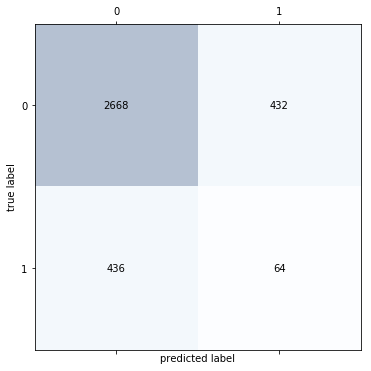

In [48]:
# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, random_state = SEED)

# instantiate and fit a dummy classifier
dummy = DummyClassifier(random_state = SEED)
dummy.fit(X_train, y_train)

# make predictions
y_pred = dummy.predict(X_test)

# SCORING
# accuracy
dummy_accuracy = dummy.score(X_test, y_test)
print('Dummy Classifier accuracy: {:.4f}\n\n'.format(dummy_accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [49]:
features['last_session_creation_time'] = features['last_session_creation_time'].fillna(method = 'ffill')

In [50]:
features['last_session_creation_time'] = features['last_session_creation_time'].fillna(method = 'ffill')

/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy:	0.8611

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      3100
         1.0       0.00      0.00      0.00       500

   micro avg       0.86      0.86      0.86      3600
   macro avg       0.43      0.50      0.46      3600
weighted avg       0.74      0.86      0.80      3600



/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


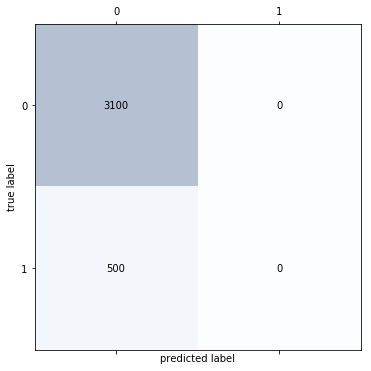

In [51]:
# imports
from sklearn.linear_model import LogisticRegression

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, random_state = SEED)



# instantiate & fit model
model = LogisticRegression(random_state = SEED)
model.fit(X_train, y_train)

# make predictions on test features
y_pred = model.predict(X_test)

# score predictions
accuracy = model.score(X_test, y_test)
print('Logistic Regression Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

Best penalty: l2
Best C: 1e-05


/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tuned Accuracy:	0.8611

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      3100
         1.0       0.00      0.00      0.00       500

   micro avg       0.86      0.86      0.86      3600
   macro avg       0.43      0.50      0.46      3600
weighted avg       0.74      0.86      0.80      3600



/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


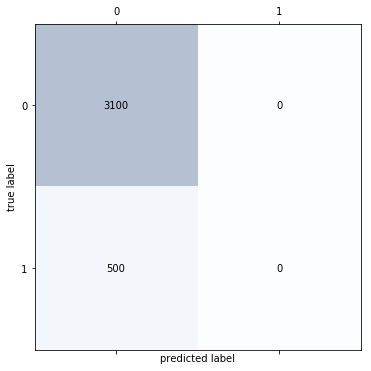

In [54]:
# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels,  test_size = .3, random_state = SEED)

# instantiate the learning algorithm
model = LogisticRegression(random_state = SEED, solver = 'lbfgs')

# create a params dict
penalty = [ 'l2']
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
hyperparameters = dict(C = C, penalty = penalty)

# instantiate & fit grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)
best_model = gridsearch.fit(X_train, y_train)

# print the best hyperparameters
best_penalty = best_model.best_estimator_.get_params()['penalty']
best_C = best_model.best_estimator_.get_params()['C']
print('Best penalty: {}'.format(best_penalty))
print('Best C: {}'.format(best_C))

# build & fit a tuned model
tuned_model = LogisticRegression(C = best_C, penalty = best_penalty)
tuned_model.fit(X_train, y_train)

# make predictions on test features
y_pred = tuned_model.predict(X_test)

# score predictions
accuracy = tuned_model.score(X_test, y_test)
print('Tuned Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, i

/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, i

Best C: 1e-05


/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Tuned Accuracy:	0.8611

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      3100
         1.0       0.00      0.00      0.00       500

   micro avg       0.86      0.86      0.86      3600
   macro avg       0.43      0.50      0.46      3600
weighted avg       0.74      0.86      0.80      3600



/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anurkayeva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


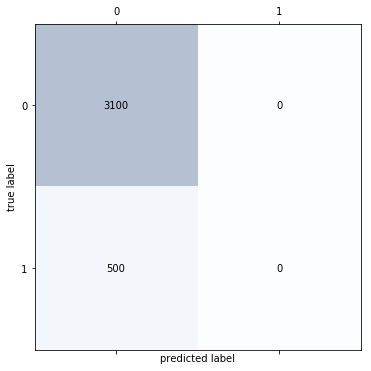

In [60]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(features, labels,  test_size = .3, random_state = SEED)

# instantiate and fit the learning algorithm
model = LinearSVC(random_state=SEED)
model.fit(X_train, y_train)

# make predictions on test features
y_pred = model.predict(X_test)

# create a params dict
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
hyperparameters = dict(C = C)

# instantiate & fit grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)
best_model = gridsearch.fit(X_train, y_train)

# print the best hyperparameters
best_C = best_model.best_estimator_.get_params()['C']
print('Best C: {}'.format(best_C))

# build & fit a tuned model
tuned_model = LinearSVC(C = best_C)
tuned_model.fit(X_train, y_train)

# make predictions on test features
y_pred = tuned_model.predict(X_test)

# score predictions
accuracy = tuned_model.score(X_test, y_test)
print('Tuned Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, random_state = SEED)

# instantiate the learning algorithm
model = DecisionTreeClassifier()

# create a params dict
depth = [2, 3, 4, 5, 6, 10, 15, 20, 25, 50]
min_samples = [.01, .025, .05, .075, .1, .2, .3]
hyperparameters = dict(max_depth = depth, min_samples_leaf = min_samples)

# instantiate grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)

# fit grid search
best_model = gridsearch.fit(X_train, y_train)

# print the best hyperparameters
best_depth = best_model.best_estimator_.get_params()['max_depth']
best_min_samples = best_model.best_estimator_.get_params()['min_samples_leaf']
print('Best max_depth: {}'.format(best_depth))
print('Best min_samples_leaf: {}'.format(best_min_samples))


# RUN MODEL WITH BEST HYPERPARAMETERS

# instantiate a DecisionTreeClassifier
tuned_model = DecisionTreeClassifier(max_depth = best_depth,
                                     min_samples_leaf = best_min_samples,
                                     random_state = SEED)

# train the model
tuned_model.fit(X_train, y_train)

# make predictions
y_pred = tuned_model.predict(X_test)

# score accuracy
tuned_model_accuracy = accuracy_score(y_test, y_pred)
print('Tuned Decision Tree Accuracy:\t{}'.format(tuned_model_accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [ ]:
print(tuned_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(tuned_model.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# instantiate the learning algorithm
model = RandomForestClassifier(random_state = SEED)

# create a params dict
depth = [2, 3, 4, 5, 6, 10, 15, 20]
min_samples = [.01, .025, .05, .075, .1, .2]
est = [5, 10, 50, 100, 500]
hyperparameters = dict(max_depth = depth, 
                       min_samples_leaf = min_samples,
                       n_estimators = est)

# instantiate grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)

# fit grid search
best_model = gridsearch.fit(X_train, y_train)

# print the best hyperparameters
best_depth = best_model.best_estimator_.get_params()['max_depth']
best_min_samples = best_model.best_estimator_.get_params()['min_samples_leaf']
best_est = best_model.best_estimator_.get_params()['n_estimators']
print('Best max_depth: {}'.format(best_depth))
print('Best min_samples_leaf: {}'.format(best_min_samples))
print('Best n_estimators: {}'.format(best_est))


# BUILD MODEL WITH BEST HYPERPARAMETERS

# instantiate a RandomForestClassifier
tuned_model = RandomForestClassifier(max_depth = best_depth,
                                     min_samples_leaf = best_min_samples,
                                     n_estimators = best_est,
                                     random_state = SEED)

# train the model
tuned_model.fit(X_train, y_train)

# make predictions
tuned_model_y_pred = tuned_model.predict(X_test)

# SCORING
# accuracy
accuracy_score(y_test, tuned_model_y_pred)

# classification report
print(classification_report(y_test, tuned_model_y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = tuned_model_y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC